In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


## Data Preparation

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
                            
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.iloc[0,:]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
print(df.isna().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
attFeatures = []
for i in df.columns:
    attFeatures.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[Yes, No]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,1,[1]
9,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


In [11]:
print(df.Department.unique())
print('\n')
print(df.BusinessTravel.unique())
print('\n')
print(df.EducationField.unique())
print('\n')
print(df.Gender.unique())
print('\n')
print(df.JobRole.unique())
print('\n')
print(df.MaritalStatus.unique())
print('\n')
print(df.Attrition.unique())

['Sales' 'Research & Development' 'Human Resources']


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


['Female' 'Male']


['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


['Single' 'Married' 'Divorced']


['Yes' 'No']


## Data Visualization

### Descriptive statistics

We look at the distribution for some of the numerical variables to gain some insights about the data. For example, we would like to know the distribution of impotant features like Distance from Home and Monthly income.

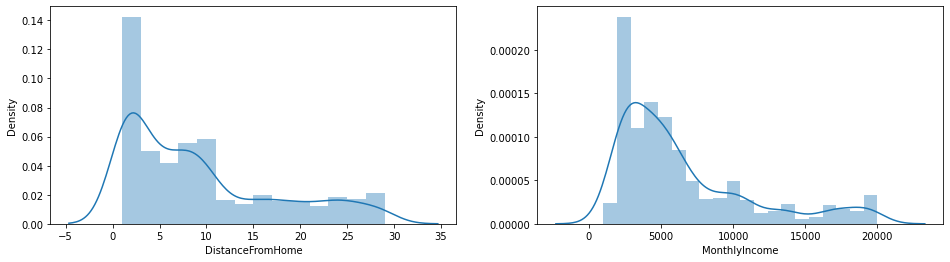

In [12]:
fig, ax = plt.subplots(1,2, figsize = (16,4))
sns.distplot(df['DistanceFromHome'], ax = ax[0])
sns.distplot(df['MonthlyIncome'], ax = ax[1])
plt.show()

To get a better understanding about the data, we will plot the distribution for some of the categorical variables. For example, how many male and female employees leave the company out of the total employees in the company.

In [13]:
dfs = df.groupby(['Attrition', 'Gender']).size().reset_index()
dfs

,Attrition,Gender,0
0,No,Female,501
1,No,Male,732
2,Yes,Female,87
3,Yes,Male,150


In [14]:
df_plot_Gen = df.groupby(['Attrition', 'Gender']).size().reset_index().pivot(columns = 'Attrition', index = 'Gender', values = 0)
df_plot_Gen

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


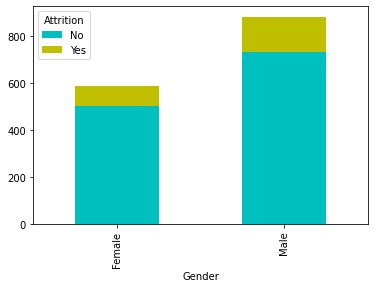

In [15]:
df_plot_Gen.plot(kind = 'bar', stacked = True, color = ['c','y'])
plt.show()

Here, we have calculated the 95th percentile for Job Involvement and Performance Rating
scores. Subsequently, we have plotted their distributions. 

In [16]:
Inv_95th_pctl = df.JobInvolvement.quantile(0.95)
Per_95th_pctl = df.PerformanceRating.quantile(0.95)

print(Inv_95th_pctl)
print(Per_95th_pctl)

4.0
4.0


Lets have a look at the categorical data and their distributions between different categories.

In [17]:
df_plot_Dep = df.groupby(['Attrition', 'Department']).size().reset_index().pivot(columns = 'Attrition', index = 'Department', values = 0)
df_plot_Ove = df.groupby(['Attrition', 'OverTime']).size().reset_index().pivot(columns = 'Attrition', index = 'OverTime', values = 0)
df_plot_Inv = df.groupby(['Attrition', 'JobInvolvement']).size().reset_index().pivot(columns = 'Attrition', index = 'JobInvolvement', values = 0)
df_plot_Per = df.groupby(['Attrition', 'PerformanceRating']).size().reset_index().pivot(columns = 'Attrition', index = 'PerformanceRating', values = 0)

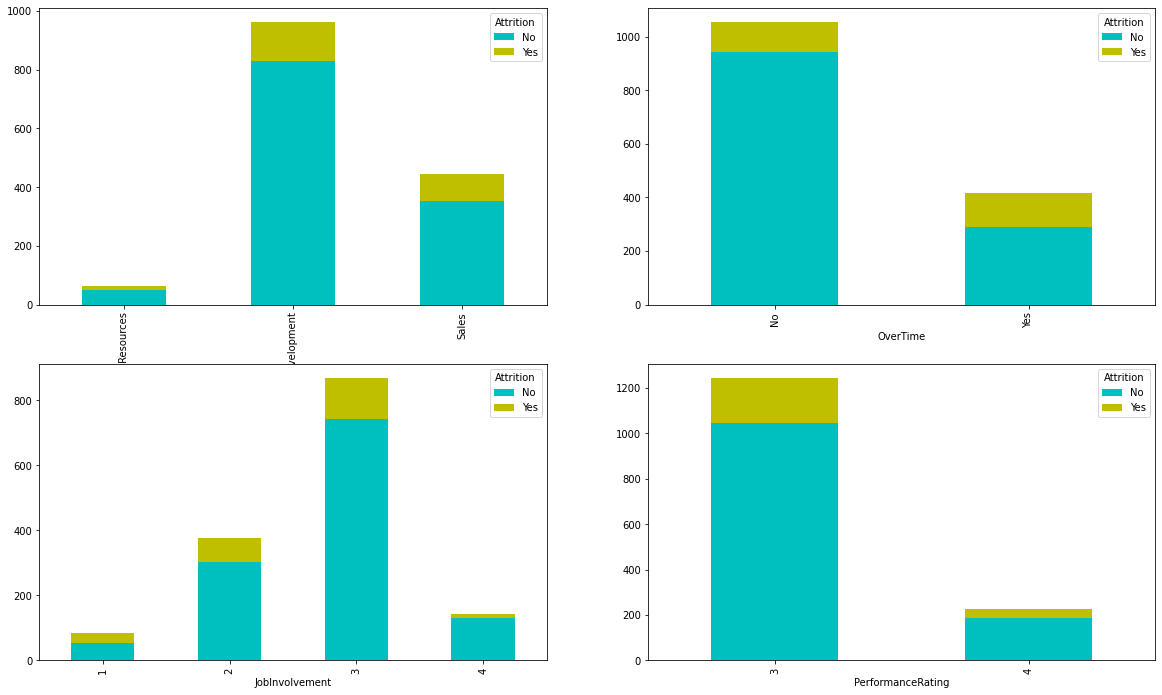

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
df_plot_Dep.plot(kind = 'bar', stacked = True, color = ['c','y'], ax = ax[0,0])
df_plot_Ove.plot(kind = 'bar', stacked = True, color = ['c','y'], ax = ax[0,1])
df_plot_Inv.plot(kind = 'bar', stacked = True, color = ['c','y'], ax = ax[1,0])
df_plot_Per.plot(kind = 'bar', stacked = True, color = ['c','y'], ax = ax[1,1])
plt.show()

In [19]:
df_plot_Stock = df.groupby(['MaritalStatus', 'StockOptionLevel']).size().reset_index().pivot(columns = 'StockOptionLevel', index = 'MaritalStatus', values = 0)
df_plot_Stock

StockOptionLevel,0,1,2,3
MaritalStatus,,,,
Divorced,8.0,195.0,75.0,49.0
Married,153.0,401.0,83.0,36.0
Single,470.0,NaN,NaN,NaN


We will look at how attrition changes for some of the numerical variables. We'll plot some of the parameters such as Monthly Income, Distance from Home, years since last promotion, and hourly rate versus years at the company. We would like to see if staying long in the company affects any of these parameters, and how the patterns change for attrition group vs no attrition.

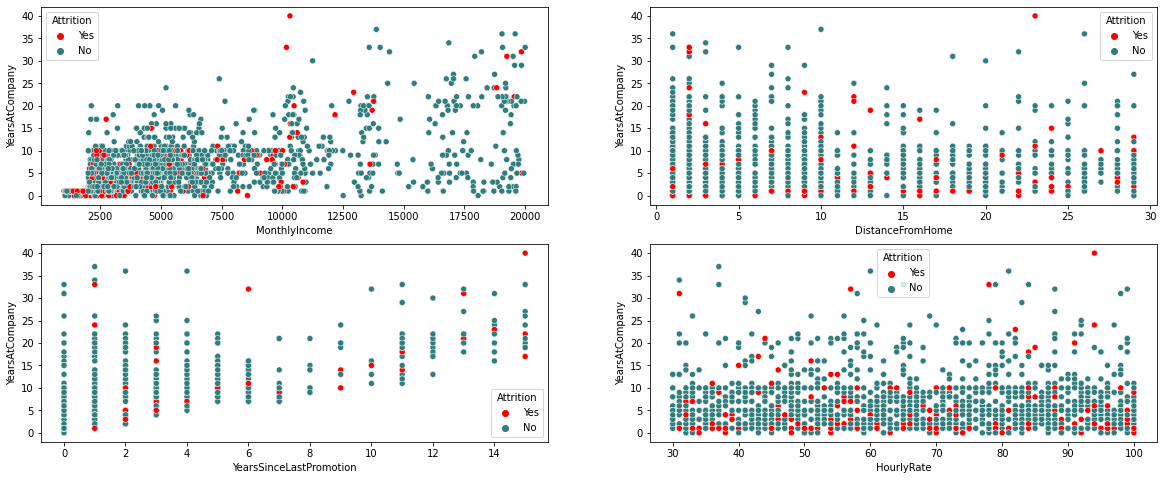

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
sns.scatterplot(data = df, x = "MonthlyIncome", y = "YearsAtCompany", hue="Attrition", palette = ['r','#307D7E'], ax = ax[0,0])
sns.scatterplot(data = df, x = "DistanceFromHome", y = "YearsAtCompany", hue="Attrition", palette = ['r','#307D7E'], ax = ax[0,1])
sns.scatterplot(data = df, x = "YearsSinceLastPromotion", y = "YearsAtCompany", hue="Attrition", palette = ['r','#307D7E'], ax = ax[1,0])
sns.scatterplot(data = df, x = "HourlyRate", y = "YearsAtCompany", hue="Attrition", palette = ['r','#307D7E'], ax = ax[1,1])
plt.show()

From the plots above, it's difficult to find patterns of attrition. However, we certainly say that:

* the attrition is not directly correlated with hourly rate. The number of attritions for low hourly rate people is as much as the number of attrition for high hourly rate people.
* It appears that it is not much correlated with any of the variables except for MonthlyIncome to some extent as shown above. Other than that, the people with attrition are spread out the whole variable range.

## Data Processing

### Outliers

Outliers can affect the performance of the model to a great extent. We'll look at the number of outliers and try to remove/reduce them. Here the criteria for being an outlier is to be outside the upper and lower limit defined below.

In [21]:
def qr_outliers(col):
    outliers = []
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [22]:
col_outliers = []
for col in df.columns:
    if df[col].dtype == 'O' : continue
    else : 
        outliers = qr_outliers(df[col])
        if outliers != []:
            col_outliers.append(col)
            print(col,':' ,outliers)

MonthlyIncome : [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
NumCompaniesWorked : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Perform

Now we check unique values for some of these parameters.

In [23]:
print('NumCompaniesWorked:', df.NumCompaniesWorked.unique())
print('PerformanceRating:', df.PerformanceRating.unique())
print('StockOptionLevel:', df.StockOptionLevel.unique())

NumCompaniesWorked: [8 1 6 9 0 4 5 2 7 3]
PerformanceRating: [3 4]
StockOptionLevel: [0 1 3 2]


Since we have different solutions for handling constant columns versus columns with outliers, we seperate these two. so we store the constant columns in constant_cols and keep the outlier columns in col_outliers.

In [24]:
constant_cols = col_outliers[1:4]
col_outliers[1:4] = []
col_outliers

['MonthlyIncome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [25]:
def box_plot_outliers(cols, df):
    fig, ax = plt.subplots(7,2, figsize = (8, 15))
    
    i = 0
    j = 0
    for col in cols:
        #print(col)
        sns.boxplot(df[col], ax = ax[i, j])

        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel(col)
        j += 1

        df.loc[df[col] > 0, col], fitted_lambda = stats.boxcox(df[df[col] > 0][col], lmbda = None)
        sns.boxplot(df[col], ax = ax[i, j], color = '#FEE23E')
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        i += 1
        j -= 1
        
    fig.suptitle('Before [left] and After [Right] BoxCox Transformation for Removing Outliers ', fontsize = 12)
    fig.subplots_adjust(top = 0.98)
    fig.tight_layout()
    
    plt.show()

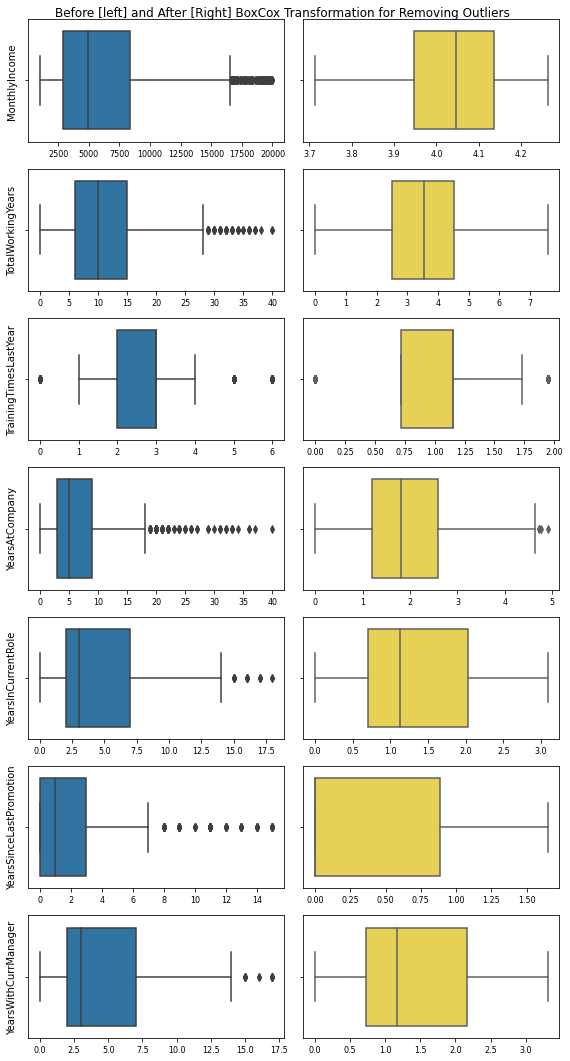

In [26]:
box_plot_outliers(col_outliers, df)

As we can see in the box plots above that MonthlyIncome has the most outliers followed by YearsAtCompany and TotalWorkingYears. In the yellow plots above, the columns are cleaned from outliers and the distribution becomes smoother for them.

In [27]:
def constant_cols_outliers(cols, df):
    fig, ax = plt.subplots(3,2, figsize = (8, 5))
    
    i = 0
    j = 0
    for col in cols:
        #print(col)
        
        sns.distplot(df[col], ax = ax[i, j])
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel(col)
        j += 1
        
        if col == 'NumCompaniesWorked':
            df.loc[df[col] == 9, col] = np.mean(df[col])
        elif col == 'PerformanceRating':
            df.loc[df[col] == 4, col] = np.mean(df[col])
        else:
            df.loc[df[col] == 3, col] = np.mean(df[col])
        
        sns.distplot(df[col], ax = ax[i, j], color = 'y')
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        i += 1
        j -= 1
        
    fig.suptitle('Before [left] and After [Right] mean imputation for Removing Constant value Outliers ', fontsize = 12)
    fig.subplots_adjust(top = 0.98)
    fig.tight_layout()
    
    plt.show()

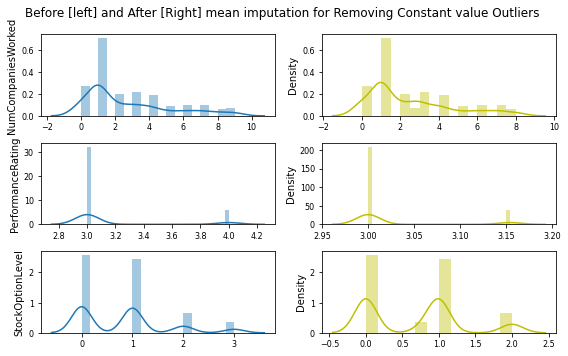

In [28]:
constant_cols_outliers(constant_cols, df)

### Encoding Categorical Columns

We have used label encoder to change the categorical data into numerical for simplicity. However, the algorithm might misunderstand the data. Since sequencing the categories doesn't mean any relationship between different categories. If the categories were something like low, medium and high, then using label encoder would be reasonable as there is a sequence relaitonship between these category values. But for categories such as HR, sales and R&D there is no such a relationship.

In [29]:
%%time
#onehotenc = OneHotEncoder()
labelenc = LabelEncoder()
df['Attrition'] = labelenc.fit_transform(df['Attrition'])
df['Department'] = labelenc.fit_transform(df['Department'])
df['EducationField'] = labelenc.fit_transform(df['EducationField'])
df['Gender'] = labelenc.fit_transform(df['Gender'])
df['JobRole'] = labelenc.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelenc.fit_transform(df['MaritalStatus'])
df['BusinessTravel'] = labelenc.fit_transform(df['BusinessTravel'])
df['OverTime'] = labelenc.fit_transform(df['OverTime'])

CPU times: user 6.78 ms, sys: 0 ns, total: 6.78 ms
Wall time: 6.81 ms


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Removing constant columns

In [31]:
print(df.Over18.unique())
print(df.EmployeeCount.unique())
print(df.StandardHours.unique())
print(df.EmployeeNumber.unique())

['Y']
[1]
[80]
[   1    2    4 ... 2064 2065 2068]


In [32]:
df.drop('Over18', axis = 1, inplace = True)
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)

### Feature Correlations

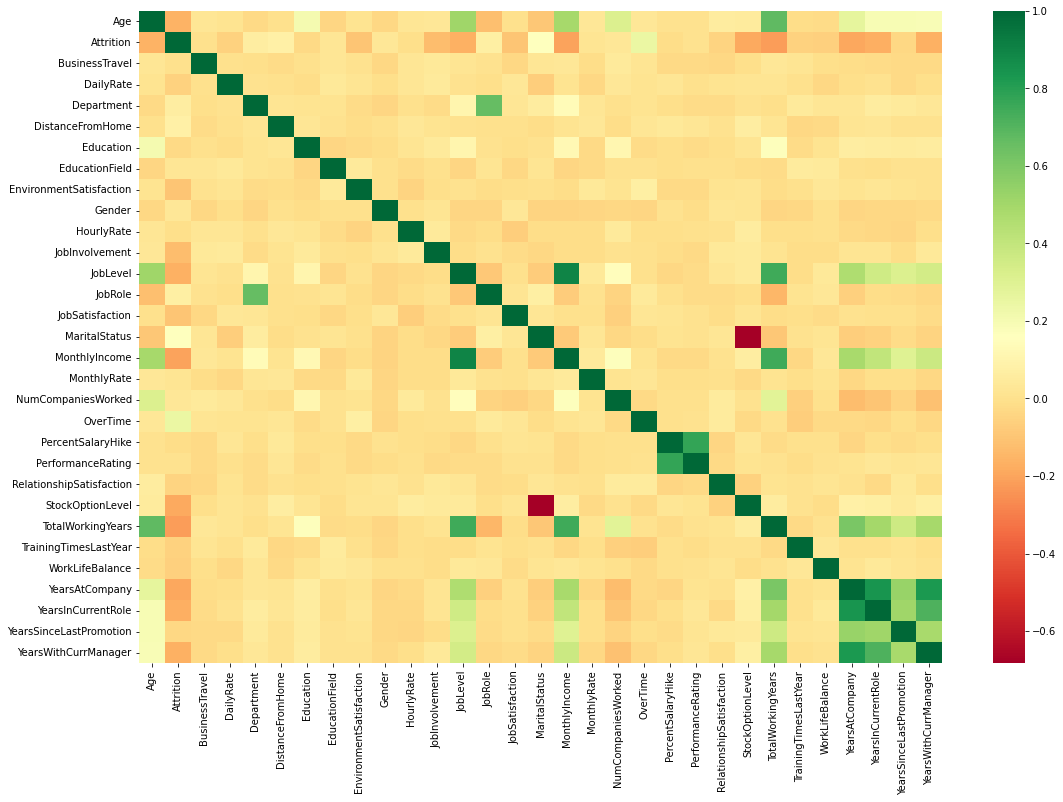

In [33]:
fig, ax = plt.subplots(1,1, figsize = (18,12))
sns.heatmap(df.corr(), cmap = 'RdYlGn')
plt.show()

From the corrolation plot we can infer that:
* Attrition has negative correlation with monthly income, total working years, Stock option Level, years at company, years in current role, years with current manager, job satisfactoin, job involvement, environment satisfaction and age.
* Attrition has positive correlation only with over time, Marital status, and Distance from Home.
* There is a high correlation between Percent salary hike and performance rating as well as job Level and monthly income.
* Stock otpion has strong negative correlation with Marital Status. We will plot a barplot to have a closer look on how they relate.
* Years at company, years in current role, years since last promotion, years with current manager, total working years, monthly income and job level are also correlated significantly.

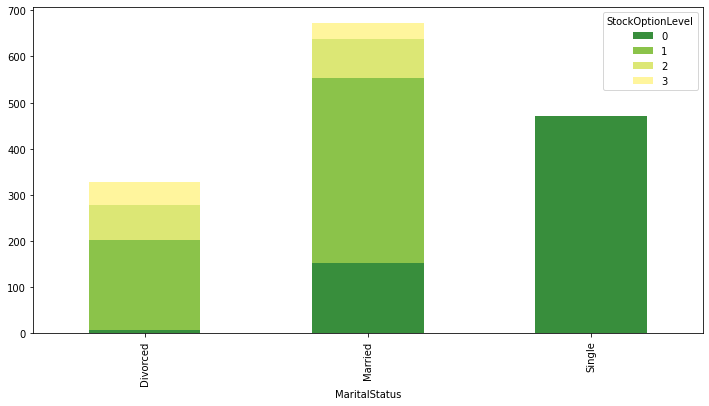

In [34]:
fig, ax = plt.subplots(figsize = (12,6))
df_plot_Stock.plot(kind = 'bar', stacked = True, color = ['#388E3C','#8BC34A','#DCE775', '#FFF59D'], ax = ax)
#plt.legend(labels = 'StockOptionLevel')
plt.show()

Now lets look at the various correlations with the attrition sorted in the descending order.

In [35]:
df.drop('Attrition', axis = 1).corrwith(df.Attrition).sort_values(ascending = False)

OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.030383
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033592
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.051867
DailyRate                  -0.056652
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
Age                        -0.159205
YearsWithCurrManager       -0.163686
JobLevel                   -0.169105
YearsInCurrentRole         -0.176056
StockOptionLevel           -0.186680
Y

We can see that there is a high correlation between Attrition and OverTime. So, working overtime has a positive impact on attrition. In other words, employees are more likely to leave if they are made to work overtime.  